In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
%run ./auxiliarfunctions.ipynb

#### - Understanding dirichlet distribution

In [3]:
size = 10
d1 = np.random.dirichlet((1, 1, 1), size)
d1

array([[0.16190838, 0.41625741, 0.42183421],
       [0.24575702, 0.22437335, 0.52986963],
       [0.26086558, 0.33672185, 0.40241258],
       [0.40527654, 0.10179101, 0.49293246],
       [0.2637899 , 0.13028196, 0.60592814],
       [0.07312624, 0.41398083, 0.51289293],
       [0.04105939, 0.46863491, 0.4903057 ],
       [0.33199666, 0.62406143, 0.04394191],
       [0.4999306 , 0.07928081, 0.42078859],
       [0.06518586, 0.78319937, 0.15161477]])

Text(0.5, 1.0, 'Dirichlet distribution')

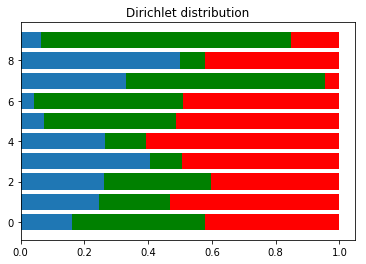

In [4]:
d1_t = d1.transpose()

plt.barh(range(size), d1_t[0])
plt.barh(range(size), d1_t[1], left=d1_t[0], color='g')
plt.barh(range(size), d1_t[2], left=d1_t[0]+d1_t[1], color='r')
plt.title("Dirichlet distribution")

Text(0.5, 1.0, 'Dirichlet Distribution')

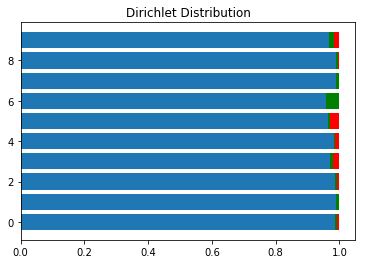

In [5]:
d2 = np.random.dirichlet((99, 1, 1), size)

d2_t = d2.transpose()

plt.barh(range(size), d2_t[0])
plt.barh(range(size), d2_t[1], left=d2_t[0], color='g')
plt.barh(range(size), d2_t[2], left=d2_t[0]+d2_t[1], color='r')
plt.title("Dirichlet Distribution")

#### - Check variance, mean, median

In [6]:
df1 = pd.DataFrame(data = d1.T)

In [7]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.148485,0.170541,0.070834,0.205255,0.245330,0.230709,0.253348,0.290062,0.223546,0.391985
min,0.161908,0.224373,0.260866,0.101791,0.130282,0.073126,0.041059,0.043942,0.079281,0.065186
25%,0.289083,0.235065,0.298794,0.253534,0.197036,0.243554,0.254847,0.187969,0.250035,0.108400
50%,0.416257,0.245757,0.336722,0.405277,0.263790,0.413981,0.468635,0.331997,0.420789,0.151615
75%,0.419046,0.387813,0.369567,0.449104,0.434859,0.463437,0.479470,0.478029,0.460360,0.467407
max,0.421834,0.529870,0.402413,0.492932,0.605928,0.512893,0.490306,0.624061,0.499931,0.783199


In [8]:
calculate_median(df1)

[0.416257406899171,
 0.24575701931405658,
 0.3367218461142414,
 0.40527653731906227,
 0.2637899045992485,
 0.4139808317938747,
 0.46863490565302623,
 0.33199665703854697,
 0.42078858698078264,
 0.15161476793092454]

In [9]:
df1

,0,1,2,3,4,5,6,7,8,9
0,0.161908,0.245757,0.260866,0.405277,0.263790,0.073126,0.041059,0.331997,0.499931,0.065186
1,0.416257,0.224373,0.336722,0.101791,0.130282,0.413981,0.468635,0.624061,0.079281,0.783199
2,0.421834,0.529870,0.402413,0.492932,0.605928,0.512893,0.490306,0.043942,0.420789,0.151615


In [10]:
df2 = pd.DataFrame(data = d2.T)
df2.describe()

,0,1,2,3,4,5,6,7,8,9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.566469,0.567883,0.565912,0.552812,0.563054,0.545404,0.540610,0.567111,0.568231,0.549560
min,0.003778,0.000690,0.004890,0.006696,0.001125,0.006117,0.000629,0.000667,0.003129,0.015834
25%,0.006286,0.005478,0.006605,0.014197,0.008280,0.018525,0.021443,0.005926,0.005268,0.016045
50%,0.008794,0.010265,0.008320,0.021698,0.015435,0.030933,0.042257,0.011185,0.007407,0.016256
75%,0.498111,0.499655,0.497555,0.496652,0.499437,0.496941,0.499685,0.499667,0.498436,0.492083
max,0.987429,0.989044,0.986789,0.971607,0.983440,0.962949,0.957114,0.988149,0.989465,0.967910


In [11]:
calculate_median(df2)

[0.008793651916841698,
 0.010265069687076396,
 0.008320244505166852,
 0.021697579537562732,
 0.015434963728044983,
 0.030933379017049,
 0.04225721882056646,
 0.011184631462688683,
 0.007406556510776324,
 0.01625621474287456]

In [12]:
df2

,0,1,2,3,4,5,6,7,8,9
0,0.987429,0.989044,0.986789,0.971607,0.983440,0.962949,0.957114,0.988149,0.989465,0.967910
1,0.003778,0.010265,0.004890,0.006696,0.001125,0.006117,0.042257,0.011185,0.007407,0.016256
2,0.008794,0.000690,0.008320,0.021698,0.015435,0.030933,0.000629,0.000667,0.003129,0.015834


#### - Simulate cases in participative platform

In [13]:
categories = 4
comments = 100
alpha = 0.520
s = np.random.dirichlet((2 * alpha, alpha), (categories, comments))
c1, c2, c3, c4 = s[:, :, 0]

In [14]:
s[0][:15]

array([[0.06516334, 0.93483666],
       [0.92092305, 0.07907695],
       [0.38738725, 0.61261275],
       [0.9988335 , 0.0011665 ],
       [0.863855  , 0.136145  ],
       [0.99807057, 0.00192943],
       [0.78728774, 0.21271226],
       [0.85295196, 0.14704804],
       [0.81763698, 0.18236302],
       [0.81727758, 0.18272242],
       [0.71157837, 0.28842163],
       [0.67516463, 0.32483537],
       [0.82995338, 0.17004662],
       [0.99724344, 0.00275656],
       [0.04357329, 0.95642671]])

In [15]:
s[0][0].sum()

1.0

Text(0.5, 1.0, 'Dirichlet Distribution')

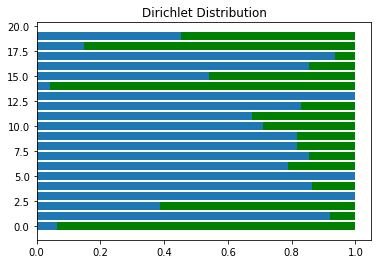

In [16]:
sT = s[0][:20].transpose()

plt.barh(range(20), sT[0])
plt.barh(range(20), sT[1], left=sT[0], color='g')
plt.title("Dirichlet Distribution")

In [17]:
print('percentage to like and dislike: ', s[0][0])
print('sum of percentages: ', s[0][0].sum())
print('how many categories and comments was voted: ', s.shape)

percentage to like and dislike:  [0.06516334 0.93483666]
sum of percentages:  1.0
how many categories and comments was voted:  (4, 100, 2)


In [18]:
votes1 = np.random.random(size=(100, comments)) < c1
votes2 = np.random.random(size=(70, comments)) < c2
votes3 = np.random.random(size=(120, comments)) < c3
votes4 = np.random.random(size=(90, comments)) < c4

In [19]:
# Like and dislike
votes1[1,:5]

array([False,  True,  True,  True,  True])

In [20]:
votes = np.vstack([votes1,votes2,votes3,votes4])

In [21]:
votes.shape

(380, 100)

In [22]:
pca = PCA(n_components=2).fit_transform(votes)

In [23]:
pca.shape

(380, 2)

In [24]:
pca[:5]

array([[-0.4019336 ,  2.28310759],
       [-0.26668608,  2.4805588 ],
       [ 0.03873165,  2.39973055],
       [-0.93594062,  2.44612276],
       [-0.54213557,  2.47005289]])

In [25]:
df = pd.DataFrame(pca)

#### - Plot with different color for each category

In [26]:
def deflabels(category, cat):
    for c in category:
        labels.append(cat)

In [27]:
labels = []

In [28]:
deflabels(votes1,'A')
deflabels(votes2,'B')
deflabels(votes3,'C')
deflabels(votes4,'D')

In [29]:
len(labels), len(votes)

(380, 380)

In [30]:
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

In [31]:
color_votes = [label_color_dict[label] for label in labels]

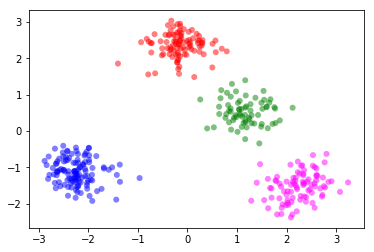

In [32]:
# plt.scatter(*pca.T)
plt.scatter(x=df[0], y=df[1], c=color_votes, edgecolor='', alpha=0.5) 

#### - Analyse votes statistics 

In [37]:
raw_data = df_raw_data(votes1, votes2, votes3, votes)
df_votes_math = pd.DataFrame(raw_data, columns = ['votes', 'std', 'mean', 'var'])

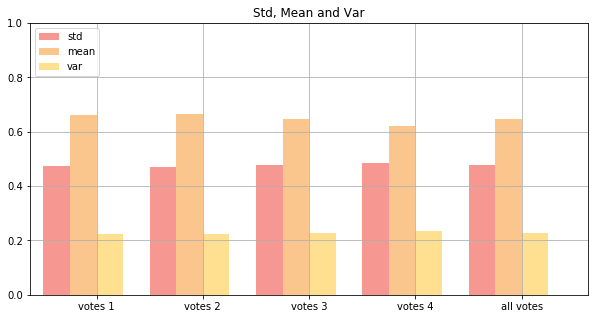

In [38]:
plot_compare_votes_group(df_votes_math)

### Change value from samples votes

In [39]:
categories = 4
comments = 100
alpha = 0.520
s = np.random.dirichlet((3 * alpha, alpha), (categories, comments))
c1, c2, c3, c4 = s[:, :, 0]

In [40]:
s[0][0].sum()

1.0

In [41]:
c3.shape

(100,)

In [42]:
s

array([[[3.58478025e-01, 6.41521975e-01],
        [9.32157603e-01, 6.78423972e-02],
        [5.02382986e-01, 4.97617014e-01],
        [1.17159461e-01, 8.82840539e-01],
        [9.74076019e-01, 2.59239805e-02],
        [9.17795827e-01, 8.22041725e-02],
        [8.17889978e-01, 1.82110022e-01],
        [9.02607737e-01, 9.73922626e-02],
        [8.30477631e-01, 1.69522369e-01],
        [5.14122393e-01, 4.85877607e-01],
        [5.55087034e-01, 4.44912966e-01],
        [8.94530460e-01, 1.05469540e-01],
        [8.50216536e-01, 1.49783464e-01],
        [3.98603001e-01, 6.01396999e-01],
        [9.70381519e-01, 2.96184808e-02],
        [8.75067870e-01, 1.24932130e-01],
        [9.52766929e-01, 4.72330709e-02],
        [1.86087852e-01, 8.13912148e-01],
        [2.14280161e-01, 7.85719839e-01],
        [9.98926504e-01, 1.07349635e-03],
        [6.70190911e-01, 3.29809089e-01],
        [9.99321731e-01, 6.78269071e-04],
        [5.64861763e-01, 4.35138237e-01],
        [1.66175993e-01, 8.3382400

Text(0.5, 1.0, 'Dirichlet Distribution')

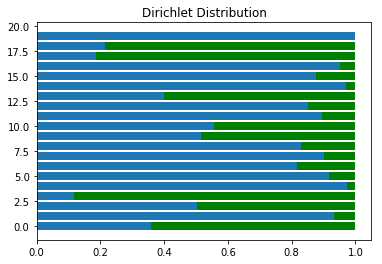

In [43]:
sT = s[0][:20].transpose()

plt.barh(range(20), sT[0])
plt.barh(range(20), sT[1], left=sT[0], color='g')
plt.title("Dirichlet Distribution")

In [44]:
print('percentage to like and dislike: ', s[0][0])
print('sum of percentages: ', s[0][0].sum())
print('how many categories and comments was voted: ', s.shape)

percentage to like and dislike:  [0.35847802 0.64152198]
sum of percentages:  1.0
how many categories and comments was voted:  (4, 100, 2)


In [45]:
votes1_num = np.random.random(size=(100, comments))
votes1 = votes1_num < c1
votes2_num = np.random.random(size=(70, comments))
votes2 = votes2_num < c2
votes3_num = np.random.random(size=(120, comments))
votes3 = votes3_num < c3
votes4_num = np.random.random(size=(90, comments))
votes4 = votes4_num < c4

In [46]:
votes_num = np.vstack([votes1_num,votes2_num,votes3_num,votes4_num])
votes = np.vstack([votes1,votes2,votes3,votes4])

In [47]:
votes.shape

(380, 100)

In [48]:
pca = PCA(n_components=2).fit_transform(votes)

In [49]:
labels = []

In [50]:
deflabels(votes1,'A')
deflabels(votes2,'B')
deflabels(votes3,'C')
deflabels(votes4,'D')

In [51]:
color_votes = [label_color_dict[label] for label in labels]

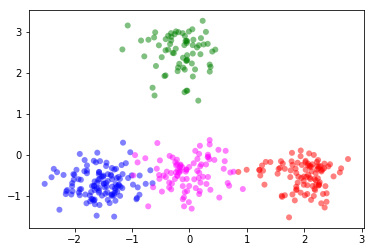

In [52]:
plt.scatter(*pca.T, c=color_votes, edgecolor='', alpha=0.5) 

In [59]:
raw_data = df_raw_data(votes1, votes2, votes3, votes)
pd.DataFrame(raw_data, columns = ['votes', 'std', 'mean', 'var'])

,votes,std,mean,var
0,votes 1,0.455275,0.706700,0.207275
1,votes 2,0.437692,0.741714,0.191574
2,votes 3,0.425345,0.762833,0.180919
3,votes 4,0.432820,0.750333,0.187333
4,all votes,0.437970,0.741211,0.191817


In [206]:
pca[:5]

array([[ 2.16827593, -1.00075957],
       [ 1.22291799, -0.36698626],
       [ 1.75838979, -0.53963428],
       [ 1.411285  , -0.17433636],
       [ 2.392251  , -0.93618504]])

In [ ]:
aX_train, X_test, y_train, y_test = train_test_split(df.iloc[:,-10:-1], df['category'], test_size = 0.2, random_state=17)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("acc: ", accuracy_score(y_exp, y_pred))

#### - Applying Naive Bayes to predict Agreed/Not comment

In [60]:
s.shape, votes.shape

((4, 100, 2), (380, 100))

In [61]:
votes1_num.shape

(100, 100)

In [62]:
votes1_num[:10].shape

(10, 100)

In [63]:
df1 = pd.DataFrame(votes1)
df1['category'] = 1

In [64]:
df2 = pd.DataFrame(votes2)
df2['category'] = 2

In [65]:
df3 = pd.DataFrame(votes3)
df3['category'] = 3

In [66]:
df4 = pd.DataFrame(votes4)
df4['category'] = 4

In [67]:
frames = [df1, df2, df3, df4]

In [68]:
df = pd.concat(frames)

In [140]:
df.head()

,index,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,category
0,0,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
1,1,0,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1
2,2,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,3,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,1
4,4,0,1,0,0,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1


In [70]:
df[0:1]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,False,True,True,False,True,True,True,True,True,False,...,True,True,True,True,True,False,False,True,True,1


In [71]:
df = df.reset_index()

In [72]:
df[0][1]

False

In [73]:
d = {False:0,True:1}
df = df.replace(d)

In [74]:
df.head()

,index,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,category
0,0,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
1,1,0,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1
2,2,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,3,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,1
4,4,0,1,0,0,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1


In [105]:
# without first and category column
df_teste = df.iloc[:, 2:-1]

In [106]:
df_teste.head()

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,1,1,0,1,1,1,1,1,0,1,...,0,1,1,1,1,1,0,0,1,1
1,1,1,0,1,1,1,1,0,0,1,...,0,1,1,1,1,1,1,0,1,1
2,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
3,1,1,0,1,1,1,1,1,0,1,...,0,1,1,1,1,1,1,0,1,0
4,1,0,0,1,1,1,1,1,0,0,...,0,1,0,1,1,1,0,0,1,1


In [107]:
df_teste.shape

(380, 99)

In [113]:
df.iloc[:,1:-1].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,1,0,0,1,1
1,0,1,1,0,1,1,1,1,0,0,...,0,1,1,1,1,1,1,0,1,1
2,0,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,1,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,1,1,0,1,0
4,0,1,0,0,1,1,1,1,1,0,...,0,1,0,1,1,1,0,0,1,1


In [108]:
df[:][:].shape

(380, 102)

In [229]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [274]:
accs = []

In [275]:
ncols = df.iloc[:, 1:-1].shape[1]

In [282]:
for i in range(2, ncols):
    print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})

I 2
acc:  0.5657894736842105
I 3
acc:  0.5263157894736842
I 4
acc:  0.5
I 5
acc:  0.5921052631578947
I 6
acc:  0.8421052631578947
I 7
acc:  0.6842105263157895
I 8
acc:  0.6973684210526315
I 9
acc:  0.7631578947368421
I 10
acc:  0.8026315789473685
I 11
acc:  0.8157894736842105
I 12
acc:  0.7763157894736842
I 13
acc:  0.8026315789473685
I 14
acc:  0.8157894736842105
I 15
acc:  0.8157894736842105
I 16
acc:  0.8552631578947368
I 17
acc:  0.8947368421052632
I 18
acc:  0.9342105263157895
I 19
acc:  0.9342105263157895
I 20
acc:  0.9210526315789473
I 21
acc:  0.9342105263157895
I 22
acc:  0.9473684210526315
I 23
acc:  0.9078947368421053
I 24
acc:  0.9605263157894737
I 25
acc:  0.9868421052631579
I 26
acc:  0.9736842105263158
I 27
acc:  0.9868421052631579
I 28
acc:  1.0
I 29
acc:  0.9473684210526315
I 30
acc:  0.9868421052631579
I 31
acc:  0.9473684210526315
I 32
acc:  0.9868421052631579
I 33
acc:  0.9868421052631579
I 34
acc:  0.9736842105263158
I 35
acc:  0.9605263157894737
I 36
acc:  0.98684

In [285]:
df_accs = pd.DataFrame.from_dict(accs)

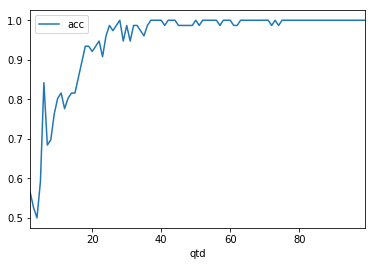

In [289]:
df_accs.plot.line(x='qtd', y='acc')

In [292]:
#print("acc: ", accuracy_score(y_exp, y_pred))
#print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(y_exp, y_pred))